# Joint Probability, Conditional Probability and Bayes' Rule

In [1]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

## Learning Objectives of Part 1-b

- To understand and be able to simulate joint probabilities and conditional probabilities;
- To understand Bayes' Theorem and its utility.

## Joint Probability & Conditional Probability

### Joint Probability

We have already encountered joint probabilities in the previous notebook, perhaps without knowing it: $P(A,B)$ is the probability two events $A$ and $B$ _both_ occurring.
* For example, getting two heads in a row.

If $A$ and $B$ are independent, then $P(A,B)=P(A)P(B)$ but be warned: this is not always (or often) the case.

One way to think of this is considering "AND" as multiplication: the probability of A **and** B is the probability of A **multiplied** by the probability of B.

#### Hands-On: Joint Probability and Coin Flipping

Verify that $P(A,B)=P(A)P(B)$ in the two fair coin-flip case (A=heads, B=heads) by 
- first simulating two coins being flipped together and calculating the proportion of occurences with two heads;
- then simulating one coin flip and calculating the proportion of heads and then doing that again and multiplying the two proportions.

Your two calculations should give "pretty close" results and not the same results due to the (in)accuracy of simulation. 

0.2521


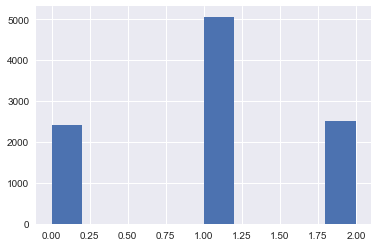

In [2]:
# Solution: Calculate P(A,B)
x_0 = np.random.binomial(2, 0.5, 10000)
p_ab = np.mean(x_0==2)

# Now, plot the histogram of the results
plt.hist(x_0);
print(p_ab)

In [3]:
# Solution: Calculate P(A)P(B)
x_1 = np.random.binomial(1, 0.5, 10000)
x_2 = np.random.binomial(1, 0.5, 10000)
p_a = np.mean(x_1 == 1)
p_b = np.mean(x_2 == 1)
p_a*p_b

0.24812585999999998

**Note:** In order to use such simulation and _hacker statistics_ approaches to "prove" results such as the above, we're gliding over several coupled and deep technicalities. This is in the interests of the pedagogical nature of this introduction. For the sake of completeness, we'll mention that we're essentially
- Using the proportion in our simulations as a proxy for the probability (which, although Frequentist, is useful to allow you to start getting your hands dirty with probability via simluation).

Having stated this, for ease of instruction, we'll continue to do so when thinking about joint & conditional probabilities of both simulated and real data. 

#### Hands-On: Joint probability for birds

What is the probability that two randomly selected birds have beak depths over 10 ?

In [4]:
# Import data & store lengths in a pandas series
df_12 = pd.read_csv('../data/finch_beaks_2012.csv')
lengths = df_12['blength']

# Calculate P(A)P(B) of two birds having beak lengths > 10
p_a = np.mean(lengths > 10)
p_b = np.mean(lengths > 10)
p_a*p_b

0.724891534007516

* Calculate the joint probability using the resampling method, that is, by drawing random samples (with replacement) from the data. First calculate $P(A)P(B)$:

In [5]:
# Calculate P(A)P(B) using resampling methods
n_samples = 100000
p_a = sum( np.random.choice(lengths, size=n_samples) > 10 )/n_samples
p_b = sum( np.random.choice(lengths, size=n_samples) > 10 )/n_samples
p_a*p_b

0.7223979595

Now calculate $P(A,B)$:

In [7]:
# Calculate P(A,B) using resampling methods
n_samples = 100000
samples = np.random.choice(lengths, size=(n_samples, 2))
x = samples > (10, 10)
p_ab = sum( np.prod(x, axis=1) )/n_samples
p_ab

0.72577

**Task:** Interpret the results of your simulations.

### Conditional Probability

Now that we have a grasp on joint probabilities, lets consider conditional probabilities, that is, the probability of some $A$, knowing that some other $B$ is true. We use the notation $P(A|B)$ to denote this. For example, you can ask the question "What is the probability of a finch beak having depth $<10$, knowing that the finch of of species 'fortis'?"

#### Example: conditional probability for birds

1. What is the probability of a finch beak having depth > 10 ?
2. What if we know the finch is of species 'fortis'?
3. What if we know the finch is of species 'scandens'?

In [11]:
# Q1 Answer
np.mean(lengths > 10)

0.8514056224899599

In [14]:
# Q2 Answer
df_fortis = df_12.loc[df_12['species'] == 'fortis']
np.mean( df_fortis['blength'] > 10 )

0.6942148760330579

In [15]:
# Q3 Answer
df_scandens = df_12.loc[df_12['species'] == 'scandens']
np.mean( df_scandens['blength'] > 10 )

1.0

**Note:** These proportions are definitely different. We can't say much more currently but we'll soon see how to use hypothesis testing to see what else we can say about the differences between the species of finches.

### Joint and conditional probabilities

Conditional and joint probabilites are related by the following:
$$ P(A,B) = P(A|B)P(B)$$

**Homework exercise for the avid learner:** verify the above relationship using simulation/resampling techniques in one of the cases above.

![](../images/joint-conditional-marginal.png)

### Hands on example: drug testing

**Question:** Suppose that a test for using a particular drug is 99% sensitive and 99% specific. That is, the test will produce 99% true positive results for drug users and 99% true negative results for non-drug users. Suppose that 0.5% (5 in 1,000) of people are users of the drug. What is the probability that a randomly selected individual with a positive test is a drug user?

**If we can answer this, it will be really cool as it shows how we can move from knowing $P(+|user)$ to $P(user|+)$, a MVP for being able to move from $P(data|model)$ to $P(model|data)$.**

In the spirit of this workshop, it's now time to harness your computational power and the intuition of simulation to solve this drug testing example. 

* Before doing so, what do you think the answer to the question _"What is the probability that a randomly selected individual with a positive test is a drug user?"_ is? Write down your guess.

In [25]:
# Take 10,000 subjects
n = 100000
# Sample for number of users, non-users
users = np.random.binomial(n, 0.005)
non_users = n - users
print('users:', users)
print('non-users:', non_users)

users: 480
non-users: 99520


In [27]:
# How many of these users tested +ve ?
u_pos = np.random.binomial(users, .99)
print('positive users:', u_pos)
# How many of these non-users tested +ve ?
non_pos = np.random.binomial(non_users, .01)
print('positive non-users:', non_pos)

positive users: 475
positive non-users: 1006


In [28]:
# how many of those +ve tests were for users?
u_pos / (u_pos + non_pos)

0.32072923700202566

**Discussion**: What you have been able to do here is to solve the following problem: you knew $P(+|user)=0.99$, but you were trying to figure out $P(user|+)$. Is the answer what you expected? If not, why not?

**Comment**: the number we found is the answer to the quesion: what is the probability that a positive tested person is a drug user? I.e. the "domain" is restricted to users who have been tested positive. 

**Key note:** This is related to the serious scientific challenge posed at the beginning here: if you know the underlying parameters/model, you can figure out the distribution and the result, but often we have only the experimental result and we're trying to figure out the most appropriate model and parameters.

It is Bayes' Theorem that lets us move between these.

## 2. Bayes' Theorem

$$P(B|A) = \frac{P(A|B)P(B)}{P(A)}$$

As you may have guessed, it is Bayes' Theorem that will allow us to move back and forth between $P(data|model)$ and $P(model|data)$. As we have seen, $P(model|data)$ is usually what we're interested in as data scientists yet $P(data|model)$ is what we can easily compute, either by simulating our model or using analytic equations.

**One of the coolest things:** Bayes Theorem can be proved with a few lines of mathematics. Your instructor will do this on the chalk/white-board now.

### Bayes Theorem solves the above drug testing problem

Bayes Theorem can be used to analytically derive the solution to the 'drug testing' example above as follows.

From Bayes Theorem, 

$$P(user|+) = \frac{P(+|user)P(user)}{P(+)}$$



We can expand the denominator here into 

$$P(+)  = P(+,user) + P(+,non-user) $$

so that

$$ P(+)=P(+|user)P(user) + P(+|non-user)P(non-user)$$

and 

$$P(user|+) = \frac{P(+|user)P(user)}{P(+|user)P(user) + P(+|non-user)P(non-user)}$$.

Calculating this explicitly yields

$$P(user|+) = \frac{0.99\times 0.005}{0.99\times 0.005 + 0.01\times 0.995} = 0.332 $$

This means that if an individual tests positive, there is still only a 33.2% chance that they are a user! This is because the number of non-users is so high compared to the number of users.

Coming up: from Bayes Theorem to Bayesian Inference!